# Model Building

## 1. Importing Necessary Libraries

In [36]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [3]:
# Loading the Dataset
x_train = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\10. End_to_End_Heart_Attack_Risk_Prediction\\data\\processed data\\x_train.csv")
y_train = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\10. End_to_End_Heart_Attack_Risk_Prediction\\data\\processed data\\y_train.csv")
x_test = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\10. End_to_End_Heart_Attack_Risk_Prediction\\data\\processed data\\x_test.csv")
y_test = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\10. End_to_End_Heart_Attack_Risk_Prediction\\data\\processed data\\y_test.csv")

In [4]:
# visualizing the train data
x_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,-5.889159,0.012040,-1.892439,-678.802971,-85.427619,-1.587641,-2.971017,-6.854053,2.399345,-0.257607,-0.744638,-0.462742,-1.927131
1,-5.877109,0.012040,-1.892439,599.625707,-54.135478,-1.587641,0.629003,-6.934519,2.399345,-0.333054,-3.463139,0.465772,-1.927131
2,-6.081967,0.012040,-1.892439,1976.395053,-84.814153,-1.587641,-2.971017,-6.833421,2.399345,0.572300,-3.463139,-1.391256,-4.592261
3,-5.828907,-4.584667,0.992790,-1190.174443,-74.378031,-1.587641,0.629003,-6.903571,-2.169825,0.270515,-6.181640,-1.391256,-4.592261
4,-5.865058,0.012040,-1.892439,-88.758966,-60.097026,-1.587641,-2.971017,-6.835484,-2.169825,-0.634838,-3.463139,-0.462742,-1.927131


In [5]:
# visualizing the test data
x_test.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.288158,0.685763,-0.955447,-1.140737,0.698476,-0.415227,-1.025418,-1.741260,1.445998,-0.383843,-0.684974,0.255069,-2.136684
1,0.507707,0.685763,1.986608,-1.953507,0.903244,-0.415227,-1.025418,0.393608,-0.691564,-0.731282,-0.684974,-0.708525,1.128361
2,0.288158,0.685763,1.005923,-1.140737,-3.545544,2.408319,0.871954,1.029526,-0.691564,-0.731282,0.963813,0.255069,1.128361
3,0.178384,-1.458231,-0.955447,-0.315836,2.500423,-0.415227,-1.025418,-0.015197,1.445998,0.745333,-0.684974,1.218663,1.128361
4,1.825003,-1.458231,1.005923,1.371461,0.500490,2.408319,-1.025418,-0.923651,-0.691564,-0.905002,0.963813,0.255069,-0.504161


In [6]:
# visualizing the train target
y_train.head()

,output
0,0
1,0
2,1
3,1
4,0


In [7]:
# visualizing the test target
y_test.head()

,output
0,0
1,0
2,1
3,0
4,1


In [18]:
# let's load the most predictive features
features = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\10. End_to_End_Heart_Attack_Risk_Prediction\\data\\processed data\\selected_features.csv")
features = features["0"]
features

0          sex
1           cp
2       trtbps
3         chol
4          fbs
5      restecg
6     thalachh
7         exng
8      oldpeak
9          slp
10         caa
11       thall
Name: 0, dtype: object

In [21]:
# masking the train and test features with only the predictive features
x_train = x_train[features]
x_test = x_test[features]

In [20]:
x_train.columns

Index(['sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

In [22]:
x_test.columns

Index(['sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

## 2. Model Building

In [23]:
# initializing the logistic regression model
lr_model = LogisticRegression()

In [24]:
# fitting the logistic regression model 
lr_model.fit(x_train, y_train)

LogisticRegression()

In [25]:
# prediction of the training set
train_pred = lr_model.predict(x_train)
train_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [26]:
# prediction of the test set
test_pred = lr_model.predict(x_test)
test_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

## 3. Model Evaluation

In [27]:
# let's evaluate the training prediction
train_accu = accuracy_score(y_train, train_pred)
train_accu

0.8382352941176471

In [28]:
# let's evaluate the test accuracy
test_accu =  accuracy_score(y_test, test_pred)
test_accu

0.8387096774193549

In [29]:
# now let's see the confusion matrix
confusion_matrix(y_test, test_pred)

array([[11,  3],
       [ 2, 15]], dtype=int64)

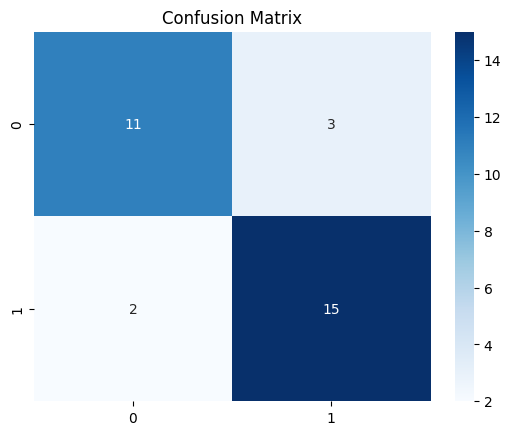

In [34]:
# let's plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, test_pred), cmap = "Blues", annot = True)
plt.title("Confusion Matrix")
plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\10. End_to_End_Heart_Attack_Risk_Prediction\\reports\\figure\\confusion_matrix.jpg")
plt.show()


In [35]:
# now let's see the classification report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.83      0.88      0.86        17

    accuracy                           0.84        31
   macro avg       0.84      0.83      0.84        31
weighted avg       0.84      0.84      0.84        31



## 4. Visualizing the Most Predictive Features

In [48]:
# coefficients 
coefficients = lr_model.coef_[0]
coefficients = list(coefficients)
coefficients

[-0.35410598318364744,
 0.9525973550836712,
 0.00031465732458631494,
 -0.009656188233886765,
 0.03425355659856204,
 0.1606303988952663,
 0.24456817943726944,
 -0.3062022420397817,
 -0.592499146265365,
 0.3815763400100589,
 -0.9795501452736539,
 -0.3305733496394423]

In [51]:
# data frame of coefficeints
feat_imp = pd.DataFrame(coefficients, index= features)
feat_imp

,0
0,
sex,-0.354106
cp,0.952597
trtbps,0.000315
chol,-0.009656
fbs,0.034254
restecg,0.160630
thalachh,0.244568
exng,-0.306202
oldpeak,-0.592499


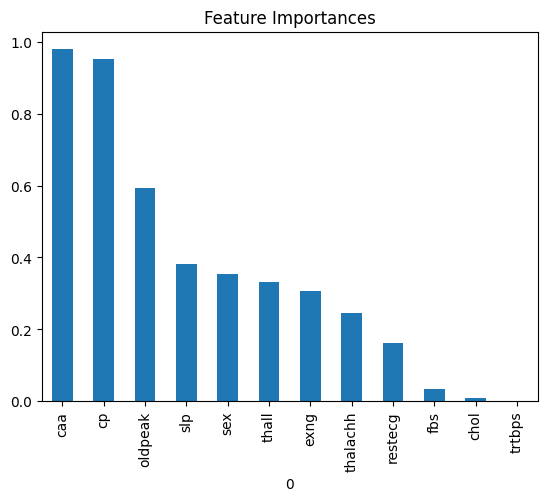

In [58]:
# let's plot a bar plot to show the feature importances
np.abs(feat_imp[0]).sort_values(ascending=False).plot.bar()
plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\10. End_to_End_Heart_Attack_Risk_Prediction\\reports\\figure\\feature_importances.jpg")
plt.title("Feature Importances")
plt.show()

## 5. Saving the Model

In [59]:
joblib.dump(lr_model, "C:\\Users\\yozil\\Desktop\\My projects\\10. End_to_End_Heart_Attack_Risk_Prediction\\models\\lrmodel.joblib")

['C:\\Users\\yozil\\Desktop\\My projects\\10. End_to_End_Heart_Attack_Risk_Prediction\\models\\lrmodel.joblib']